In [3]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import fdrcorrection

def save_df_to_npz(obj, filename):
    np.savez_compressed(filename, data=obj.values, index=obj.index.values, columns=obj.columns.values)

def load_df_from_npz(filename):
    with np.load(filename, allow_pickle=True) as f:
        obj = pd.DataFrame(**f)
    return obj

## Output a merged fileset of pre/post2016 samples including only non batch-effected variants from those sets

In [2]:
mergedpredir =  '../../data/tmp/plink/MergePrePost/'
if not os.path.exists(mergedpredir):
    os.mkdir(mergedpredir)

In [3]:
pre = '../../data/tmp/plink/merged_pre2016/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1'
post = '../../data/tmp/plink/H3/BroadPost2016_H3_B1and2_UpdateSexandID.Coord.RefAllele.NoMulti.NoSexDisc.mDupVars.renamesexchr.sorted.fixPloidy'

In [4]:
for f in [pre, post]:
    for ext in ['bed', 'bim', 'fam']:
        cmd = 'cp {f}.{ext} {o}{base}.{ext}'.format(f=f, ext=ext, o=mergedpredir, base=os.path.basename(f))
        print(cmd)
        !{cmd}

cp ../../data/tmp/plink/merged_pre2016/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1.bed ../../data/tmp/plink/MergePrePost/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1.bed
cp ../../data/tmp/plink/merged_pre2016/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1.bim ../../data/tmp/plink/MergePrePost/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1.bim
cp ../../data/tmp/plink/merged_pre2016/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1.fam ../../data/tmp/plink/MergePrePost/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1.fam
cp ../../data/tmp/plink/H3/BroadPost2016_H3_B1and2_UpdateSexandID.Coord.RefAllele.NoMulti.NoSexDisc.mDupVars.renamesexchr.sorted.fixPloidy.bed ../../data/tmp/plink/MergePrePost/BroadPost2016_H3_B1and2_UpdateSexandID.Coord.RefAllele.NoMulti.NoSexDisc.mDupVars.renamesexchr.sorted.fixPloidy.bed
cp ../../data/tmp/pl

In [4]:
pre = '{o}{base}'.format(o=mergedpredir, base=os.path.basename(pre))
post = '{o}{base}'.format(o=mergedpredir, base=os.path.basename(post))

In [6]:
pre_bim = pd.read_csv(pre+'.bim', sep='\t', header=None)
post_bim = pd.read_csv(post+'.bim', sep='\t', header=None)

post_bim[0] = post_bim[0].replace({'X':23, 'Y':24, 'XY':25, 'MT':26})

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
post_bim[0].value_counts()

2     166666
1     151672
3     137369
6     133856
4     129280
5     124672
7     109672
8     108068
10     99419
11     96721
12     94162
9      88286
13     69895
16     67105
14     64082
15     62301
18     58017
17     55893
20     46881
23     32923
22     28479
21     27555
19     21793
19     17872
24       516
26       130
Name: 0, dtype: int64

In [8]:
pre_bim[0].value_counts()

2     189519
1     179378
3     159927
6     150150
4     149313
5     142355
7     125749
8     122737
10    116649
11    113324
12    109899
9     100379
13     81422
14     74743
16     74519
15     70599
18     67020
17     64419
20     55130
23     50654
19     46144
22     32171
21     31313
24      1485
Name: 0, dtype: int64

In [9]:
pre_bim[1] = pre_bim[0].astype(str)+':'+pre_bim[3].astype(str)+':'+pre_bim[5]+':'+pre_bim[4]
pre_bim.to_csv(pre+'.bim', sep='\t', header=False, index=False)
post_bim[1] = post_bim[0].astype(str)+':'+post_bim[3].astype(str)+':'+post_bim[5]+':'+post_bim[4]
post_bim.to_csv(post+'.bim', sep='\t', header=False, index=False)

In [10]:
pre_bim.head()

,0,1,2,3,4,5
0,1,1:82154:A:G,0,82154,G,A
1,1,1:564768:T:C,0,564768,C,T
2,1,1:565196:T:C,0,565196,C,T
3,1,1:565374:A:G,0,565374,G,A
4,1,1:566206:A:G,0,566206,G,A


In [11]:
post_bim.head()

,0,1,2,3,4,5
0,1,1:54676:C:T,0,54676,T,C
1,1,1:108310:T:C,0,108310,C,T
2,1,1:256586:T:G,0,256586,G,T
3,1,1:534247:C:T,0,534247,T,C
4,1,1:723918:G:A,0,723918,A,G


In [12]:
len(set(pre_bim[1])), len(set(post_bim[1])), len(set(pre_bim[1]).intersection(set(post_bim[1])))

(2308998, 1993285, 1472305)

In [13]:
x = pre_bim[0].astype(str) + ':' + pre_bim[3].astype(str)
y = post_bim[0].astype(str) + ':' + post_bim[3].astype(str)
pre_bim.index = x
post_bim.index = y
overlap = list(set(x).intersection(set(y)))

len(set(x)), len(set(y)), len(overlap)

(2308998, 1993285, 1472316)

In [14]:
ind = (pre_bim.loc[overlap, 1] != post_bim.loc[overlap, 1])
ind = ind.index[ind]

In [15]:
pre_bim.loc[ind, :]

,0,1,2,3,4,5
2:21265341,2,2:21265341:C:T,0,21265341,T,C
2:203418726,2,2:203418726:G:A,0,203418726,A,G
4:80827799,4,4:80827799:A:G,0,80827799,G,A
4:110874669,4,4:110874669:C:T,0,110874669,T,C
9:137653750,9,9:137653750:G:A,0,137653750,A,G
20:44849078,20,20:44849078:C:T,0,44849078,T,C
7:72994476,7,7:72994476:C:A,0,72994476,A,C
6:32044172,6,6:32044172:G:A,0,32044172,A,G
18:6443104,18,18:6443104:G:A,0,6443104,A,G
10:82301536,10,10:82301536:G:C,0,82301536,C,G


In [16]:
post_bim.loc[ind, :]

,0,1,2,3,4,5
2:21265341,2,2:21265341:C:G,0,21265341,G,C
2:203418726,2,2:203418726:G:C,0,203418726,C,G
4:80827799,4,4:80827799:A:C,0,80827799,C,A
4:110874669,4,4:110874669:C:A,0,110874669,A,C
9:137653750,9,9:137653750:G:C,0,137653750,C,G
20:44849078,20,20:44849078:C:A,0,44849078,A,C
7:72994476,7,7:72994476:C:T,0,72994476,T,C
6:32044172,6,6:32044172:G:C,0,32044172,C,G
18:6443104,18,18:6443104:G:T,0,6443104,T,G
10:82301536,10,10:82301536:G:A,0,82301536,A,G


In [17]:
multiallelic_tofilt = list(post_bim.loc[ind, 1]) + list(pre_bim.loc[ind, 1])

In [19]:
phenofn = 'gs://popgen-gwas/data/metadata/Annotated_GenotypedData/preANDpost2016_Merged_Complete_Metadata_WithAge_20210818.tsv'
metadata = pd.read_csv(phenofn, sep='\t')
metadata.index = metadata['Full_IID']

group_fn = 'gs://popgen-gwas/data/metadata/Annotated_GenotypedData/OmniH3Merged_PrePost2016_AggregatedLASVPhenotypes_20210829.tsv'

groups = pd.read_csv(group_fn, sep='\t')
groups.index = groups['#IID']
ind = groups.index[groups['Post2016_NG_LASV_qPCR2xPosOrSeqPos'] | groups['Post2016_NG_LASV_SeqPos'] | groups['Pre2016_NG_LASV_SeqPos'] | groups['Pre2016_SL_LASV_AgORSeqPos'] | groups['Post2016_SL_LASV_AgPos']]
metadata['LASV_Case'] = 0
metadata.loc[ind, 'LASV_Case'] = 1
metadata['LASV_Case'].value_counts()

0    5123
1     705
Name: LASV_Case, dtype: int64

In [6]:
metadata.head()

,Full_IID,Genotype_Sex,ID_Reformat,SampleType,sex,Disease,ISTH_SandR_Key,KGH_Survivor_Key,KGH_AcuteLassa_Key,KGH_AcuteEbola_Key,...,Country,Sex_Discrepant,Sex_Discrepant_Notes,Status,Clean_HLA_ID,Epoch,Array,CollectionEpoch,Age,LASV_Case
Full_IID,,,,,,,,,,,,,,,,,,,,,
July2014NG_SM-6C4M9,July2014NG_SM-6C4M9,1,SM-6C4M9,SuspectedLassaNG,1,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,30.0,0
July2014NG_SM-4XBS9,July2014NG_SM-4XBS9,2,SM-4XBS9,Pre2016ControlNG,2,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,26.0,0
July2014NG_SM-6C4MA,July2014NG_SM-6C4MA,1,SM-6C4MA,SuspectedLassaNG,1,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,32.0,0
July2014NG_SM-6C4MB,July2014NG_SM-6C4MB,2,SM-6C4MB,SuspectedLassaNG,2,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,65.0,0
July2014NG_SM-4XBSM,July2014NG_SM-4XBSM,2,SM-4XBSM,Pre2016ControlNG,2,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,47.0,0


In [20]:
pre_fam = pd.read_csv(pre+'.fam', sep=' ', header=None)
pre_fam.index = pre_fam[1]
ind = (metadata.loc[pre_fam[1], 'Country']=='SL') & (metadata.loc[pre_fam[1], 'Array']=='Omni_5M') 
ind = ind.index[ind]
metadata.loc[ind, :].head()
filtfn = '{o}{base}.SLOmni5Mtofilt.tsv'.format(o=mergedpredir, base=os.path.basename(pre))
pre_fam.loc[ind, :].to_csv(filtfn, sep='\t', index=False, header=None)

In [21]:
merged =  '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817'
cmd = 'plink --bfile {batch1} --bmerge {batch2} --out {merged} --keep-allele-order'.format(batch1=pre, batch2=post, merged=merged, filt=filtfn)
print(cmd)
!{cmd}

plink --bfile ../../data/tmp/plink/MergePrePost/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1 --bmerge ../../data/tmp/plink/MergePrePost/BroadPost2016_H3_B1and2_UpdateSexandID.Coord.RefAllele.NoMulti.NoSexDisc.mDupVars.renamesexchr.sorted.fixPloidy --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817 --keep-allele-order
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1
  --bmerge ../../data/tmp/plink/MergePrePost/BroadPost2016_H3_B1and2_UpdateSexandID.Coord.RefAllele.NoMulti.NoSexDisc.mDupVars.renamesexchr.sorted.fixPloidy
  --keep-allele-order
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.2021

In [22]:
a = merged

In [23]:
filtvarfn = '{a}.MultiAllelicToFilt.txt'.format(a=a)
print(filtvarfn)
with open(filtvarfn, 'w') as F:
    F.write('\n'.join(multiallelic_tofilt))

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.MultiAllelicToFilt.txt


In [24]:
cmd = 'plink --make-bed --bfile {a} --out {a}.FiltSLOmni5 --keep-allele-order --remove {samp} --exclude {var}'.format(a=a, samp=filtfn, var=filtvarfn)
print(cmd)
!{cmd}

plink --make-bed --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817 --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5 --keep-allele-order --remove ../../data/tmp/plink/MergePrePost/HumanOmni25Mand5M.HasCoord.RefAllele.NoMulti.NoSexDisc.mDupVars.Geno_1e-1.SLOmni5Mtofilt.tsv --exclude ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.MultiAllelicToFilt.txt
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817
  --exclude ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.MultiAllelicToFilt.txt
  --keep-allele-order
  --make-bed
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817

In [25]:
bim = pd.read_csv('../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.bim', sep='\t', header=None)
bim['pos'] = bim[1].apply(lambda x: ':'.join(x.split(':')[0:2]))
z = bim[['pos', 1]].drop_duplicates()
z.head()

,pos,1
0,1:54676,1:54676:C:T
1,1:82154,1:82154:A:G
2,1:108310,1:108310:T:C
3,1:256586,1:256586:T:G
4,1:534247,1:534247:C:T


In [26]:
z['pos'].value_counts().head()

19:33493835    1
3:131883083    1
6:137455920    1
8:57755750     1
2:215923761    1
Name: pos, dtype: int64

In [27]:
a = '{a}.FiltSLOmni5'.format(a=a)
print(a)

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5


In [28]:
cmd = 'plink --bfile {a} --missing --keep-allele-order --out {a}'.format(a=a)
print(cmd)
!{cmd}

plink --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5 --missing --keep-allele-order --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5
  --keep-allele-order
  --missing
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5

128934 MB RAM detected; reserving 64467 MB for main workspace.
2829956 variants loaded from .bim file.
5555 people (2610 males, 2945 females) loaded from .fam.
452 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 5302 founders and 25

In [29]:
vmiss = pd.read_csv('{a}.lmiss'.format(a=a), sep='\s+')
vmiss.head()

,CHR,SNP,N_MISS,N_GENO,F_MISS
0,1,1:54676:C:T,2749,5555,0.4949
1,1,1:82154:A:G,2853,5555,0.5136
2,1,1:108310:T:C,2774,5555,0.4994
3,1,1:256586:T:G,2737,5555,0.4927
4,1,1:534247:C:T,2728,5555,0.4911


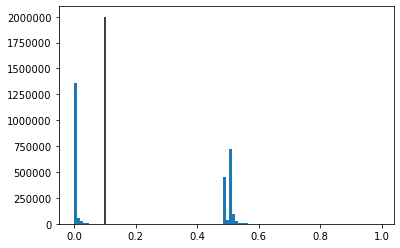

In [30]:
_ = plt.hist(vmiss['F_MISS'], bins=100)
plt.vlines(x=.1, ymin=0, ymax=2000000)

In [31]:
(vmiss['F_MISS']<.1).value_counts()

True     1470760
False    1359196
Name: F_MISS, dtype: int64

In [32]:
cmd = 'plink --make-bed --bfile {a} --geno .1 --keep-allele-order --out {a}.Geno_1e-1'.format(a=a)
print(cmd)
!{cmd}

plink --make-bed --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5 --geno .1 --keep-allele-order --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5
  --geno .1
  --keep-allele-order
  --make-bed
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1

128934 MB RAM detected; reserving 64467 MB for main workspace.
2829956 variants loaded from .bim file.
5555 people (2610 males, 2945 females) loaded from .fam.
452 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invok

In [33]:
a = '{a}.Geno_1e-1'.format(a=a)
print(a)

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1


In [34]:
pd.read_csv(a+'.bim', sep='\t', header=None)[0].value_counts()

2     121564
1     112438
3     100553
6      96351
4      95272
5      91452
7      80473
8      79165
10     75652
11     71211
12     70437
9      66010
13     51462
16     48261
14     47530
15     45921
18     43497
17     39916
20     34556
23     30672
19     28367
22     20211
21     19480
24       309
Name: 0, dtype: int64

## First we do an explicit analysis of replicate samples across and within the two arrays to find variants that are frequently discrepant between the two batches

## Output subset of samples with duplicates as a VCF

In [2]:
postpostfn = 'gs://popgen-gwas/data/metadata/Annotated_GenotypedData/ExpectedDuplicates/Post2016_DuplicateSelection_Merged_Complete_20190822.tsv'
postpost = pd.read_csv(postpostfn, sep='\t')
postpost.head()

,Duplicate_Pair,Duplicate_To_Use,Expected,F_MISS,IID,Notes,Relatedness,Status,sample_id
0,WG0284565-DNA_A10_G-5687---WG0284568-DNA_F09_G...,WG0284572-DNA_C03_S-196,True,0.04242,WG0284572-DNA_C03_S-196,"G-5567 discrepant outcome, others consistent a...",0.979046,NaN,NaN
1,WG0284565-DNA_A10_G-5687---WG0284568-DNA_F09_G...,WG0284572-DNA_C03_S-196,True,0.04244,WG0284568-DNA_F09_G-5687,"G-5567 discrepant outcome, others consistent a...",0.979034,NaN,NaN
2,WG0284565-DNA_A10_G-5687---WG0284568-DNA_F09_G...,WG0284572-DNA_C03_S-196,True,0.04247,WG0284565-DNA_A10_G-5687,"G-5567 discrepant outcome, others consistent a...",0.979046,NaN,NaN
3,WG0284565-DNA_A10_G-5687---WG0284568-DNA_F09_G...,-1,False,0.04262,WG0341176-DNA_B08_G-5567,"G-5567 discrepant outcome, others consistent a...",0.978343,NaN,NaN
4,WG0284565-DNA_B03_G-4468---WG0284572-DNA_G07_S...,WG0284586-DNA_B04_S-004,True,0.04203,WG0284586-DNA_B04_S-004,"G-6882 discrepant, others consistent and expected",1.000680,NaN,NaN


In [3]:
prepostreps = pd.read_csv('gs://popgen-gwas/data/metadata/Annotated_GenotypedData/ExpectedDuplicates/Pre_To_Post_Duplicate_Mapping_20190822.tsv', sep='\t')
prepostreps.head()

,Post_ID,Pre_ID,rel,Batch1,Batch2,Array1,Array2,Pre_Representative,Post_Representative,Duplicate_Pair,Expected
0,WG0284565-DNA_C12_G-7167,Winter2013_F-SL-149F,1.012440,H3_Batch1,Winter2013,H3,Omni2.5MA,Winter2013_F-SL-149F,WG0284565-DNA_C12_G-7167,WG0284565-DNA_C12_G-7167---Winter2013_F-SL-149F,False
1,WG0284572-DNA_E05_S-107,Winter2013_SM-3NQA5,1.007030,H3_Batch1,Winter2013,H3,Omni2.5MA,Winter2013_SM-3NQA5,WG0284572-DNA_E05_S-107,WG0284572-DNA_E05_S-107---Winter2013_SM-3NQA5,True
2,WG0284580-DNA_H09_G-7895,Winter2013_F-SL-6C,1.008870,H3_Batch1,Winter2013,H3,Omni2.5MA,Winter2013_F-SL-6C,WG0284580-DNA_H09_G-7895,WG0284580-DNA_H09_G-7895---Winter2013_F-SL-6C,False
3,WG0284582-DNA_A02_F-SL-71C,Winter2013_F-SL-71C,0.994401,H3_Batch1,Winter2013,H3,Omni2.5MA,Winter2013_F-SL-71C,WG0284582-DNA_A02_F-SL-71C,WG0284582-DNA_A02_F-SL-71C---Winter2013_F-SL-71C,True
4,WG0284582-DNA_A03_SM-72YJL,Winter2013_F-NG-C-84F,1.005620,H3_Batch1,Winter2013,H3,Omni2.5MA,Winter2013_F-NG-C-84F,WG0284582-DNA_A03_SM-72YJL,WG0284582-DNA_A03_SM-72YJL---Winter2013_F-NG-C...,True


In [4]:
preprereps = pd.read_csv('gs://popgen-gwas/data/metadata/Annotated_GenotypedData/ExpectedDuplicates/Pre2016_DuplicateSelection_Complete_20190822.tsv', sep='\t')
preprereps.head()

,Duplicate_Pair,IID,Duplicate_To_Use,Relatedness,F_MISS,Expected,Notes
0,Fall2013_SM-2986Y---July2014NG_SM-4XBSM,July2014NG_SM-4XBSM,July2014NG_SM-4XBSM,0.998971,0.03793,False,Discrepant age and 1 IgG but doesn't change ph...
1,Fall2013_SM-2986Y---July2014NG_SM-4XBSM,Fall2013_SM-2986Y,July2014NG_SM-4XBSM,0.998971,0.03857,False,Discrepant age and 1 IgG but doesn't change ph...
2,Fall2013_SM-4CY2L---March2012_SM-297Z2,Fall2013_SM-4CY2L,Fall2013_SM-4CY2L,0.992573,0.03201,False,NaN
3,Fall2013_SM-4CY2L---March2012_SM-297Z2,March2012_SM-297Z2,Fall2013_SM-4CY2L,0.992573,0.03310,False,NaN
4,July2014SL_SM-5W5QG---July2014SL_SM-5W5R2,July2014SL_SM-5W5R2,July2014SL_SM-5W5R2,1.035760,0.03945,False,Discrepant age but same phe


In [5]:
allrepsamples = list(set(postpost['IID']).union(prepostreps['Post_ID']).union(prepostreps['Pre_ID']).union(set(preprereps['IID'])))

In [8]:
prefam = pd.read_csv(pre+'.fam', sep=' ', header=None)
postfam = pd.read_csv(post+'.fam', sep='\t', header=None)
presamps = list(prefam[1])
postsamps = list(postfam[1])

In [7]:
a = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

In [41]:
cmd = 'cp {a}.fam {a}.orig.fam'.format(a=a)
print(cmd)
!{cmd}
fam = pd.read_csv(a+'.fam', sep=' ', header=None)
fam.index = fam[1]
fam[4] = metadata.loc[fam.index, 'sex'].replace({np.nan:0, 'M':1, 'F':2})
fam.loc[fam[1].isin(postsamps), 5] = 2
fam.loc[fam[1].isin(presamps), 5] = 1
fam.to_csv(a+'.fam', sep=' ', header=False, index=False)
fam[5].value_counts()

cp ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.fam ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.orig.fam


2    2841
1    2714
Name: 5, dtype: int64

In [42]:
repsamplesfn = a+'.HasReplicateSamples.tsv'
print(repsamplesfn)
fam.loc[fam[1].isin(allrepsamples), [0,1]].to_csv(repsamplesfn, sep='\t', header=None, index=False)

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.HasReplicateSamples.tsv


In [43]:
cmd = 'plink --bfile {a} --recode vcf-iid --out {a}.HasReplicateSamples --keep-allele-order --keep {a}.HasReplicateSamples.tsv'.format(a=a)
print(cmd)
!{cmd}

plink --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1 --recode vcf-iid --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.HasReplicateSamples --keep-allele-order --keep ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.HasReplicateSamples.tsv
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.HasReplicateSamples.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
  --keep ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.HasReplicateSamples.tsv
  --keep-allele-order
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.2021081

## Evaluate batch effect between the 2 H3 batches - using a machine with 104 GB RAM

In [8]:
a = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

In [45]:
repvcffn = '{a}.HasReplicateSamples.vcf'.format(a=a)
print(repvcffn)

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.HasReplicateSamples.vcf


In [46]:
repvcf = pd.read_csv(repvcffn, sep='\t', skiprows=29)
print('a')
repvcf.index = repvcf['ID']
repvcf = repvcf.iloc[:,9:]
print('b')
repvcf = repvcf.replace({'1/1':2, '0/0':0, '0/1':1, '1/0':1, './.':-1})
print('c')
repvcf.head()

a
b
c


,WG0284565-DNA_A02_G-5231,WG0284565-DNA_A04_G-5690,WG0284565-DNA_A05_G-5135,WG0284565-DNA_A10_G-5687,WG0284565-DNA_A11_G-5135,WG0284565-DNA_B01_G-5434,WG0284565-DNA_B03_G-4468,WG0284565-DNA_B07_G-5614,WG0284565-DNA_B11_G-4904,WG0284565-DNA_B12_G-7174,...,Winter2013_SM-3NQ87,Winter2013_SM-3NQ8E,Fall2013_SM-SORX,Fall2013_SM-SORZ,March2012_SM-2F38W,reGenotypedNov2013_SM-8750J_1,March2012_SM-2F38T,reGenotypedNov2013_SM-GRN85_1,reGenotypedNov2013_SM-LW4CG_1,Winter2013_SM-298CL
ID,,,,,,,,,,,,,,,,,,,,,
1:723918:G:A,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1:752721:A:G,1,2,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
1:767677:G:A,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1:771967:G:A,1,0,-1,0,1,2,1,0,1,1,...,-1,0,1,1,2,2,1,1,1,1
1:774047:G:A,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
outfn = repvcffn.replace('.vcf', '.vcf.npz')

In [48]:
save_df_to_npz(repvcf, outfn)

In [49]:
repvcf = load_df_from_npz(outfn)

In [50]:
repvcf.shape

(1470760, 1122)

In [51]:

merged_dict = dict(zip(presamps, ['B1']*len(presamps)))
print(len(merged_dict))
merged_dict.update(dict(zip(postsamps, ['B2']*len(postsamps))))
print(len(presamps), len(postsamps), len(merged_dict))

2780
2780 2841 5621


In [52]:
postpost_pairs = postpost['Duplicate_Pair'].unique()
prepre_pairs = preprereps['Duplicate_Pair'].unique()
prepost_pairs = prepostreps['Duplicate_Pair'].unique()

postpost_map = {}
postpost_indiv = []
for p in postpost_pairs:
    plist = p.split('---')
    for pval in plist:
        postpost_map[pval] = p
        postpost_indiv.append(pval)
    

prepre_map = {}
prepre_indiv = []
for p in prepre_pairs:
    plist = p.split('---')
    for pval in plist:
        prepre_map[pval] = p
        prepre_indiv.append(pval)
    
    
prepost_map = {}
prepost_indiv = []
for p in prepost_pairs:
    plist = p.split('---')
    for pval in plist:
        prepost_map[pval] = p
        prepost_indiv.append(pval)   

In [53]:
set(prepost_indiv).intersection(prepre_indiv).intersection(postpost_indiv)

set()

In [54]:
for i in list(set(prepost_indiv).intersection(prepre_indiv)):
    gpre = prepre_map[i].split('---')
    gboth = prepost_map[i].split('---')
    combined = list(set(gpre).union(set(gboth)))
    newstr = '---'.join(combined)
    for c in gpre:
        prepre_map.pop(c)
        
    for c in combined:
        prepost_map[c] = newstr
        

In [55]:
for i in list(set(prepost_indiv).intersection(postpost_indiv)):
    gpost = postpost_map[i].split('---')
    gboth = prepost_map[i].split('---')
    combined = list(set(gpost).union(set(gboth)))
    newstr = '---'.join(combined)
    for c in gpost:
        postpost_map.pop(c)
        
    for c in combined:
        prepost_map[c] = newstr

In [56]:
allreps = list(set(prepost_map.values())) + list(set(postpost_map.values())) + list(set(prepre_map.values()))

In [57]:
allindiv = []
for v in allreps:
    allindiv += v.split('---')
    
pd.Series(allindiv).value_counts().head()

WG0284570-DNA_B05_C-013-3       1
Winter2014_G3409.1              1
Winter2013_SM-3NQAK             1
WG0341172-DNA_G10_0782-LV-18    1
WG0284586-DNA_B10_S-073         1
dtype: int64

In [58]:
dupgroups = []
for dp in allreps:
    items = dp.split('---')
    b1 = []
    b2 = []
    for i in items:
        if i in repvcf.columns:
            if i in presamps:
                b1.append(i)
            elif i in postsamps:
                b2.append(i)
    dupgroups.append([b1, b2])

In [59]:
dupgroups[0]

[['Winter2013_SM-299QD'], ['WG0284582-DNA_B02_C-0304']]

In [60]:
cols = ['B1_AllRep_Concordance', 'B1_Dedup_Concordance', 'B1_AllRep_Total', 'B1_Dedup_Total',
        'B2_AllRep_Concordance', 'B2_Dedup_Concordance', 'B2_AllRep_Total', 'B2_Dedup_Total',
        'Between_AllRep_Concordance', 'Between_Dedup_Concordance', 'Between_AllRep_Total', 'Between_Dedup_Total']
results = pd.DataFrame(0, index=repvcf.index, columns=cols)
results.head()

disc = np.zeros(results.shape[0])
counter = pd.Series(disc, index=results.index)
discrepancy = pd.Series(disc, index=results.index)
for (b1, b2) in dupgroups:
    if len(b1) > 1:
        counter_new = counter.copy()
        discrepancy_new = discrepancy.copy()
        for i in range(len(b1)-1):
            for j in range(i+1, len(b1)):
                nonnull = (repvcf[b1[i]] != -1) & (repvcf[b1[j]] != -1)
                counter_new += nonnull
                discrepancy_new += ((repvcf[b1[i]] != repvcf[b1[j]]) & nonnull)
        results['B1_AllRep_Total'] += counter_new
        results['B1_AllRep_Concordance'] += discrepancy_new
        ind = counter_new > 0
        results.loc[ind, 'B1_Dedup_Concordance'] += (discrepancy_new.loc[ind] / counter_new.loc[ind])
        results.loc[ind, 'B1_Dedup_Total'] += 1
        
    if len(b2) > 1:
        counter_new = counter.copy()
        discrepancy_new = discrepancy.copy()
        for i in range(len(b2)-1):
            for j in range(i+1, len(b2)):
                nonnull = (repvcf[b2[i]] != -1) & (repvcf[b2[j]] != -1)
                counter_new += nonnull
                discrepancy_new += ((repvcf[b2[i]] != repvcf[b2[j]]) & nonnull)
        results['B2_AllRep_Total'] += counter_new
        results['B2_AllRep_Concordance'] += discrepancy_new
        ind = counter_new > 0
        results.loc[ind, 'B2_Dedup_Concordance'] += (discrepancy_new.loc[ind] / counter_new.loc[ind])
        results.loc[ind, 'B2_Dedup_Total'] += 1        
        
        
    if (len(b1) > 0) and (len(b2) > 0) :
        counter_new = counter.copy()
        discrepancy_new = discrepancy.copy()
        for i in range(len(b1)):
            for j in range(len(b2)):
                nonnull = (repvcf[b1[i]] != -1) & (repvcf[b2[j]] != -1)
                counter_new += nonnull
                discrepancy_new += ((repvcf[b1[i]] != repvcf[b2[j]]) & nonnull)
        results['Between_AllRep_Total'] += counter_new
        results['Between_AllRep_Concordance'] += discrepancy_new
        ind = counter_new > 0
        results.loc[ind, 'Between_Dedup_Concordance'] += (discrepancy_new.loc[ind] / counter_new.loc[ind])
        results.loc[ind, 'Between_Dedup_Total'] += 1        

In [61]:
results['Between_AllRep_FracConcordant'] = results['Between_AllRep_Concordance'] / results['Between_AllRep_Total']
results['Within_AllRep_FracConcordant']  = (results['B1_AllRep_Concordance'] + results['B2_AllRep_Concordance']) / (results['B1_AllRep_Total'] + results['B2_AllRep_Total'])

results['Between_Dedup_FracConcordant'] = results['Between_Dedup_Concordance'] / results['Between_Dedup_Total']
results['Within_Dedup_FracConcordant']  = (results['B1_Dedup_Concordance'] + results['B2_Dedup_Concordance']) / (results['B1_Dedup_Total'] + results['B2_Dedup_Total'])


Text(0.5, 1.0, 'All replicates')

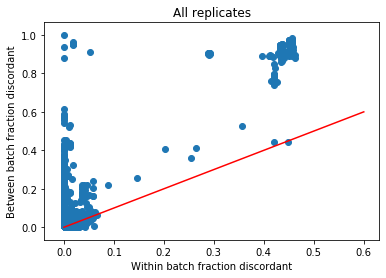

In [62]:
x = results['Within_AllRep_FracConcordant']
#x = results['B1_AllRep_Concordance'] / results['B1_AllRep_Total']
y = results['Between_AllRep_FracConcordant']
ind = (x>0) | (y>0)
plt.scatter(x.loc[ind], y.loc[ind])
plt.plot([0,.6], [0,.6], color='r')

plt.xlabel('Within batch fraction discordant')
plt.ylabel('Between batch fraction discordant')
plt.title('All replicates')

Text(0.5, 1.0, 'Deduplicated replicates')

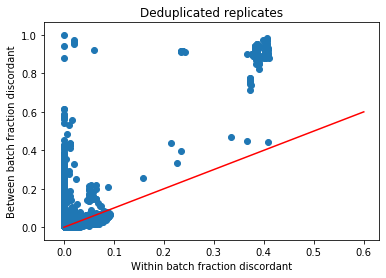

In [63]:
x = results['Within_Dedup_FracConcordant']
#x = results['B1_AllRep_Concordance'] / results['B1_AllRep_Total']
y = results['Between_Dedup_FracConcordant']
ind = (x>0) | (y>0)
plt.scatter(x.loc[ind], y.loc[ind])
plt.plot([0,.6], [0,.6], color='r')
plt.xlabel('Within batch fraction discordant')
plt.ylabel('Between batch fraction discordant')
plt.title('Deduplicated replicates')

In [64]:
results.head()

,B1_AllRep_Concordance,B1_Dedup_Concordance,B1_AllRep_Total,B1_Dedup_Total,B2_AllRep_Concordance,B2_Dedup_Concordance,B2_AllRep_Total,B2_Dedup_Total,Between_AllRep_Concordance,Between_Dedup_Concordance,Between_AllRep_Total,Between_Dedup_Total,Between_AllRep_FracConcordant,Within_AllRep_FracConcordant,Between_Dedup_FracConcordant,Within_Dedup_FracConcordant
1:723918:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,241.0,205,0.0,0.0,0.0,0.0
1:752721:A:G,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,241.0,206,0.0,0.0,0.0,0.0
1:767677:G:A,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,242.0,206,0.0,0.0,0.0,0.0
1:771967:G:A,0.0,0.0,62.0,58,0.0,0.0,377.0,234,0.0,0.0,240.0,204,0.0,0.0,0.0,0.0
1:774047:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,243.0,207,0.0,0.0,0.0,0.0


In [9]:
print(a)
resultsfn = '{a}.DuplicateDiscrepancyCounts.tsv'.format(a=a)
print(resultsfn)

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.DuplicateDiscrepancyCounts.tsv


In [66]:
results.to_csv(resultsfn, sep='\t')

In [10]:
resultsfn = '{a}.DuplicateDiscrepancyCounts.tsv'.format(a=a)
results = pd.read_csv(resultsfn, sep='\t', index_col=0)
results.head()

,B1_AllRep_Concordance,B1_Dedup_Concordance,B1_AllRep_Total,B1_Dedup_Total,B2_AllRep_Concordance,B2_Dedup_Concordance,B2_AllRep_Total,B2_Dedup_Total,Between_AllRep_Concordance,Between_Dedup_Concordance,Between_AllRep_Total,Between_Dedup_Total,Between_AllRep_FracConcordant,Within_AllRep_FracConcordant,Between_Dedup_FracConcordant,Within_Dedup_FracConcordant
1:723918:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,241.0,205,0.0,0.0,0.0,0.0
1:752721:A:G,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,241.0,206,0.0,0.0,0.0,0.0
1:767677:G:A,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,242.0,206,0.0,0.0,0.0,0.0
1:771967:G:A,0.0,0.0,62.0,58,0.0,0.0,377.0,234,0.0,0.0,240.0,204,0.0,0.0,0.0,0.0
1:774047:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,243.0,207,0.0,0.0,0.0,0.0


In [12]:
pd.Series(results.index).apply(lambda x: x.split(':')[0]).value_counts().sort_index()

1     112438
10     75652
11     71211
12     70437
13     51462
14     47530
15     45921
16     48261
17     39916
18     43497
19     28367
2     121564
20     34556
21     19480
22     20211
23     30672
24       309
3     100553
4      95272
5      91452
6      96351
7      80473
8      79165
9      66010
dtype: int64

In [13]:
a = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

## Check missingness

In [70]:
cmd = 'plink --missing --bfile {a} --out {a}'.format(a=a)
print(cmd)
!{cmd}

plink --missing --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1 --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
  --missing
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1

128934 MB RAM detected; reserving 64467 MB for main workspace.
1470760 variants loaded from .bim file.
5555 people (2610 males, 2945 females) loaded from .fam.
5555 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 5302 founde

In [71]:
varmiss = pd.read_csv('{a}.lmiss'.format(a=a), sep='\s+')
vc = varmiss['N_MISS'].value_counts()
vc.loc[vc.index>500].head()

502    6
503    4
511    4
514    4
539    4
Name: N_MISS, dtype: int64

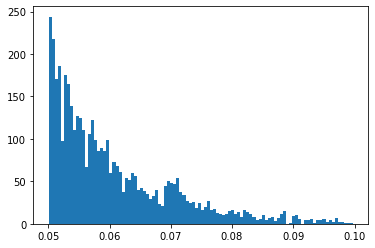

In [72]:
_ = plt.hist(varmiss.loc[varmiss['F_MISS']>.05, 'F_MISS'], bins=100)

## Allele frequency association approach

## Repeat with MLMA

In [73]:
a

'../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

In [74]:
dupfiltfn_fam = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210720.Geno_1e-1.filtBatchvars20210720.DupsToExclude.txt'


In [75]:
filt_cmd = 'plink --make-bed --remove {filt} --bfile {a} --out {a}.deduped --keep-allele-order'.format(a=a, filt=dupfiltfn_fam)
print(filt_cmd)
!{filt_cmd}

afilt = '{a}.deduped'.format(a=a)
#produce a pruned subset of markers that are in approximate linkage equilibrium with each other
prunefn =  '{a}.pruneld_3e-1.maf_1e-1'.format(a=afilt)
prune_cmd = 'plink --bfile {a} --out {prune} --indep-pairwise 1000kb 1 .3 --maf .1 --hwe 1e-12 --geno .1'.format(a=afilt, prune=prunefn)
print(prune_cmd)
!{prune_cmd}

#do PCA
pca_cmd = 'plink --bfile {a} --out {prune} --pca 20 --extract {prune}.prune.in'.format(a=afilt, prune=prunefn)
print(pca_cmd)
!{pca_cmd}

#make square relationship matrix 
rel_cmd = 'plink --make-rel square --bfile {a} --out {prune} --extract {prune}.prune.in'.format(a=afilt, prune=prunefn)
print(rel_cmd)
!{rel_cmd}

relid = pd.read_csv(prunefn+'.rel.id', header=None, sep ='\t')[1].iloc[0:]
rel = pd.read_csv(prunefn+'.rel', header=None, sep='\t')
print(prunefn)
rel.index = relid
rel.columns = relid
relfn = prunefn+'.rel.withids.tsv'
rel.to_csv(relfn, sep='\t')
del(rel)

fam = pd.read_csv(afilt+'.fam', sep=' ', header=None)
fam = fam.rename(columns = {1:'IID', 5:'Batch', 0:'FID'})
fam['Country'] = metadata.loc[fam['IID'], 'Country'].replace({'NG':'0', 'SL':'1'}).replace(np.nan, '-9').values
fam['LASV_Case'] = metadata.loc[fam['IID'], 'LASV_Case'].replace(np.nan, 0).values                                                 
fam['Batch']=metadata.loc[fam['IID'], 'Array'].replace({'H3':1, 'Omni_25M_A':0, 'Omni_5M':0, 'Omni_25M_B':0}).values
display(pd.crosstab([fam['Country'], fam['LASV_Case']], fam['Batch']))
covfn = afilt+'.cov'
fam.to_csv(covfn, sep='\t', index=False, header=True)

'''
ncores = 15
formula = "Batch ~ 1 + Country"
formula = '"%s"' % formula
nulloutfile = "{a}.nullmodel.rds".format(a=a)
outfile = "{a}.results.tsv".format(a=a)
cmd = 'Rscript --vanilla ../../code/gwas_analysis/run_GMMAT_fromPLINK.R %s %s.bed %s %s %s %s %d' % (covfn, a, relfn, formula, nulloutfile, outfile, ncores)
print(cmd)
!{cmd}
'''

plink --make-bed --remove ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210720.Geno_1e-1.filtBatchvars20210720.DupsToExclude.txt --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1 --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped --keep-allele-order
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
  --keep-allele-order
  --make-bed
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped
  --remove ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210720.Geno_1e-1.filtBatchvars

Batch                 0     1
Country LASV_Case            
0       0          1329   637
        1            48   346
1       0          1031  1401
        1            84    38

'\nncores = 15\nformula = "Batch ~ 1 + Country"\nformula = \'"%s"\' % formula\nnulloutfile = "{a}.nullmodel.rds".format(a=a)\noutfile = "{a}.results.tsv".format(a=a)\ncmd = \'Rscript --vanilla ../../code/gwas_analysis/run_GMMAT_fromPLINK.R %s %s.bed %s %s %s %s %d\' % (covfn, a, relfn, formula, nulloutfile, outfile, ncores)\nprint(cmd)\n!{cmd}\n'

In [76]:
gcsdir = 'gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/'
outfn = afilt
print(outfn)
cmd = 'gsutil -m cp %s.* %s' % (outfn, gcsdir)
print(cmd)
!{cmd}

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped
gsutil -m cp ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.* gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/
Copying file://../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.bed [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a comp

In [77]:
scriptfn = 'gs://ebola-gwas-lbr/Code/run_GMMAT_fromPLINK_parallel.R'
container = 'quay.io/dkotliar/gmmat_mkl:0.4'
    
subcmdbase = '''dsub --project sabeti-ebola-gwas \
--name %s --provider google-v2 --min-ram 32 --min-cores 8 --boot-disk-size 600 --disk-size 1000 --zones "us-east1-b" \
--logging %s \
--image %s --ssh \
--input SCRIPT=%s \
--input BEDFILE=%s.bed \
--input FAMFILE=%s.fam \
--input BIMFILE=%s.bim \
--input COVFILE=%s.cov \
--input RELATFILE=%s \
--output NULLFILE=%s \
--output OUTFINAL=%s \
--env FORMULA='Batch ~ LASV_Case + Country + 1\' \
--env NCORES=7 \
--script submit.sh'''   

workingdir = gcsdir
localdir = '../../data/tmp/plink/MergePrePost/'

logbase = os.path.join(workingdir, 'log', "{job-name}-{job-id}.log")    
fullcmds = []
name = 'Merged_CovCC_minfilt'
outfn = afilt
bedbase = outfn.replace(localdir, workingdir)
relfile = bedbase + '.pruneld_3e-1.maf_1e-1.rel.withids.tsv'
nulloutfile = bedbase + ".nullmodelCovCC.rds"
outfinal = bedbase + ".resultsCovCC.tsv"

fullcmd = subcmdbase % (name,logbase,container,scriptfn, bedbase, bedbase, bedbase, bedbase, relfile, nulloutfile, outfinal)        
print(fullcmd)

dsub --project sabeti-ebola-gwas --name Merged_CovCC_minfilt --provider google-v2 --min-ram 32 --min-cores 8 --boot-disk-size 600 --disk-size 1000 --zones "us-east1-b" --logging gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/log/{job-name}-{job-id}.log --image quay.io/dkotliar/gmmat_mkl:0.4 --ssh --input SCRIPT=gs://ebola-gwas-lbr/Code/run_GMMAT_fromPLINK_parallel.R --input BEDFILE=gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.bed --input FAMFILE=gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.fam --input BIMFILE=gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.bim --input COVFILE=gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1

In [78]:
!{fullcmd}

Job properties:
  job-id: merged-cov--dkotliar--220107-183431-36
  job-name: merged-covcc-minfilt
  user-id: dkotliar
Provider internal-id (operation): projects/sabeti-ebola-gwas/operations/12205151942840317542
Launched job-id: merged-cov--dkotliar--220107-183431-36
To check the status, run:
  dstat --provider google-v2 --project sabeti-ebola-gwas --jobs 'merged-cov--dkotliar--220107-183431-36' --users 'dkotliar' --status '*'
To cancel the job, run:
  ddel --provider google-v2 --project sabeti-ebola-gwas --jobs 'merged-cov--dkotliar--220107-183431-36' --users 'dkotliar'
merged-cov--dkotliar--220107-183431-36


In [81]:
! dstat --provider google-v2 --project sabeti-ebola-gwas --jobs 'merged-cov--dkotliar--220107-183431-36' --users 'dkotliar' --status '*'


Job Name         Status    Last Update
---------------  --------  --------------
merged-covcc...  Success   01-07 19:50:13



In [82]:
pd.read_csv('gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.resultsCovCC.tsv', sep='\t').head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL
0,1:723918:G:A,1,723918,G,A,4887,0.005495,0.091774,17.643072,119.441912,0.106453
1,1:752721:A:G,1,752721,A,G,4895,0.003867,0.235955,5.455054,274.928950,0.742160
2,1:767677:G:A,1,767677,G,A,4898,0.003256,0.079318,-6.852854,107.229136,0.508111
3,1:771967:G:A,1,771967,G,A,4843,0.014449,0.460975,16.048086,372.242244,0.405531
4,1:774047:G:A,1,774047,G,A,4910,0.000814,0.013646,4.769975,20.289312,0.289615


In [83]:
nulloutfile = 'gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.nullmodelCovCC.rds'
outfinal = 'gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.resultsCovCC.tsv'
localdir = '../../data/tmp/plink/MergePrePost/'
for fn in [nulloutfile, outfinal]:
    cmd = 'gsutil -m cp %s %s' % (fn, localdir)
    print(cmd)
    !{cmd}

gsutil -m cp gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.nullmodelCovCC.rds ../../data/tmp/plink/MergePrePost/
Copying gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.nullmodelCovCC.rds...
| [1/1 files][178.2 MiB/178.2 MiB] 100% Done                                    
Operation completed over 1 objects/178.2 MiB.                                    
gsutil -m cp gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.resultsCovCC.tsv ../../data/tmp/plink/MergePrePost/
Copying gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.resultsCovCC.tsv...
| [1/1 files][172.2 MiB/172.2 MiB] 100% Done                                    
Operation completed over 1

In [19]:
outfile = "{a}.deduped.resultsCovCC.tsv".format(a=a)
outfile

'../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.deduped.resultsCovCC.tsv'

In [20]:
mlmares = pd.read_csv(outfile, sep='\t')
mlmares.index = mlmares['SNP']
mlmares.head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL
SNP,,,,,,,,,,,
1:723918:G:A,1:723918:G:A,1,723918,G,A,4887,0.005495,0.091774,17.643072,119.441912,0.106453
1:752721:A:G,1:752721:A:G,1,752721,A,G,4895,0.003867,0.235955,5.455054,274.928950,0.742160
1:767677:G:A,1:767677:G:A,1,767677,G,A,4898,0.003256,0.079318,-6.852854,107.229136,0.508111
1:771967:G:A,1:771967:G:A,1,771967,G,A,4843,0.014449,0.460975,16.048086,372.242244,0.405531
1:774047:G:A,1:774047:G:A,1,774047,G,A,4910,0.000814,0.013646,4.769975,20.289312,0.289615


In [21]:
mlmares['CHR'].value_counts()

2     121551
1     112415
3     100530
6      96325
4      95249
5      91443
7      80456
8      79147
10     75632
11     71196
12     70428
9      65991
13     51451
16     48249
14     47521
15     45915
18     43487
17     39906
X      30668
19     28357
20     23544
22     20206
21     19478
20     11007
Y        309
Name: CHR, dtype: int64

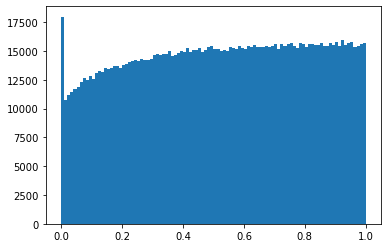

In [22]:
_ = plt.hist(mlmares['PVAL'], bins=100)

In [23]:
results['MLMA_P'] = np.nan
overlap = list(set(results.index).intersection(set(mlmares.index)))
results.loc[overlap, 'MLMA_P'] = mlmares.loc[overlap, 'PVAL'].values


In [24]:
ind = ~results['MLMA_P'].isnull()
results.loc[:, 'MLMA_Q'] = np.nan
results.loc[ind, 'MLMA_Q'] =fdrcorrection(results.loc[ind, 'MLMA_P'], method='indep')[1]

In [25]:
results.loc[:, 'MLMA_logP'] = results.loc[:, 'MLMA_P'].apply(np.log10)*-1
results.loc[:, 'MLMA_logQ'] = results.loc[:, 'MLMA_Q'].apply(np.log10)*-1

#ind = results['MLMA_logP']>20
#results.loc[ind, 'MLMA_logP']=20

#ind = results['MLMA_logQ']>20
#results.loc[ind, 'MLMA_logQ']=20

In [26]:
results['Between_AllRep_FracConcordant'] = results['Between_AllRep_Concordance'] / results['Between_AllRep_Total']
results['Within_AllRep_FracConcordant']  = (results['B1_AllRep_Concordance'] + results['B2_AllRep_Concordance']) / (results['B1_AllRep_Total'] + results['B2_AllRep_Total'])


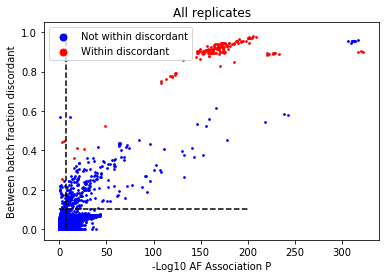

In [27]:
x = results['MLMA_logP']
y = results['Between_AllRep_FracConcordant']
ind = ~x.isnull()
iswithindisc = (results['Within_AllRep_FracConcordant']>0.1)

plt.scatter(x.loc[ind & ~iswithindisc], y.loc[ind & ~iswithindisc], s=3, color='b', label='Not within discordant')
plt.scatter(x.loc[ind & iswithindisc], y.loc[ind & iswithindisc], s=3, color='r', label='Within discordant')
plt.legend(loc='upper left', markerscale=4)
plt.xlabel('-Log10 AF Association P')
plt.ylabel('Between batch fraction discordant')
plt.title('All replicates')
plt.hlines(y=.1, xmin=0, xmax=200, linestyle='--')
plt.vlines(x=-1*np.log10(5*(10**-8)), ymin=0, ymax=1, linestyle='--')

In [28]:
ind = results['MLMA_logP']>50
results.loc[ind, 'MLMA_logP']=50

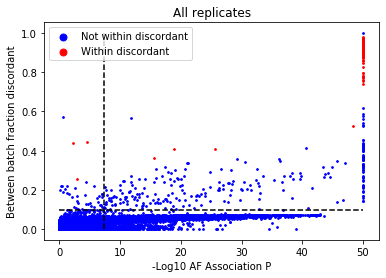

In [29]:
x = results['MLMA_logP']
y = results['Between_AllRep_FracConcordant']
ind = ~x.isnull()
iswithindisc = (results['Within_AllRep_FracConcordant']>0.1)

plt.scatter(x.loc[ind & ~iswithindisc], y.loc[ind & ~iswithindisc], s=3, color='b', label='Not within discordant')
plt.scatter(x.loc[ind & iswithindisc], y.loc[ind & iswithindisc], s=3, color='r', label='Within discordant')
plt.legend(loc='upper left', markerscale=4)
plt.xlabel('-Log10 AF Association P')
plt.ylabel('Between batch fraction discordant')
plt.title('All replicates')
plt.hlines(y=.1, xmin=0, xmax=50, linestyle='--')
plt.vlines(x=-1*np.log10(5*(10**-8)), ymin=0, ymax=1, linestyle='--')

In [30]:
pd.crosstab(x.loc[ind]>-1*np.log10(5*(10**-8)), y.loc[ind]>.1)

Between_AllRep_FracConcordant,False,True
MLMA_logP,,
False,1466180,38
True,3839,404


Text(0.5, 1.0, 'All replicates')

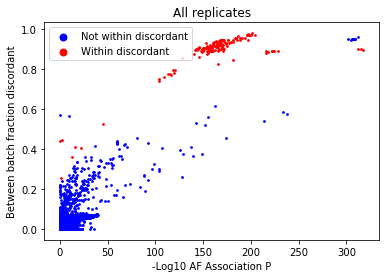

In [31]:
x = results['MLMA_logQ']
y = results['Between_AllRep_FracConcordant']
ind = ~x.isnull()

iswithindisc = (results['Within_AllRep_FracConcordant']>0.1)
plt.scatter(x.loc[ind & ~iswithindisc], y.loc[ind & ~iswithindisc], s=3, color='b', label='Not within discordant')
plt.scatter(x.loc[ind & iswithindisc], y.loc[ind & iswithindisc], s=3, color='r', label='Within discordant')
plt.legend(loc='upper left', markerscale=4)
plt.xlabel('-Log10 AF Association P')
plt.ylabel('Between batch fraction discordant')
plt.title('All replicates')

In [32]:
ind = results['Within_AllRep_FracConcordant']>.1
pd.Series([x.split(':')[0] for x in results.loc[ind, :].index]).value_counts()

24    147
dtype: int64

## Repeat analysis per country

In [36]:
a

'../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

In [37]:
a = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

In [38]:
dupfiltfn_fam = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210720.Geno_1e-1.filtBatchvars20210720.DupsToExclude.txt'
duptofilt = pd.read_csv(dupfiltfn_fam, sep='\t')['1']

In [39]:
for country in ['NG', 'SL']:
    fam = pd.read_csv(a+'.fam', sep=' ', header=None)
    fam.index = fam[1]
    tokeep = fam.index[(metadata.loc[fam.index, 'Country']==country) & ~fam[1].isin(duptofilt)]
    fam_country = fam.loc[tokeep, :]
    keepfn = '{a}.{c}_tokeep.txt'.format(a=a,c=country)
    fam_country.to_csv(keepfn,sep='\t', index=False)

    b = '{a}.{c}'.format(a=a, c=country)

    filt_cmd = 'plink --make-bed --bfile {a} --out {b}.deduped --keep {keep}'.format(a=a, b=b, keep=keepfn)
    print(filt_cmd)
    !{filt_cmd}

    b = '{b}.deduped'.format(b=b)
    
    #produce a pruned subset of markers that are in approximate linkage equilibrium with each other
    prunefn =  '{a}.pruneld_3e-1.maf_1e-1'.format(a=b)
    prune_cmd = 'plink --bfile {a} --out {prune} --indep-pairwise 1000kb 1 .3 --maf .1'.format(a=b, prune=prunefn)
    print(prune_cmd)
    !{prune_cmd}

    #do PCA
    pca_cmd = 'plink --bfile {a} --out {prune} --pca 20 --extract {prune}.prune.in'.format(a=b, prune=prunefn)
    print(pca_cmd)
    !{pca_cmd}

    #make square relationship matrix 
    rel_cmd = 'plink --make-rel square --bfile {a} --out {prune} --extract {prune}.prune.in'.format(a=b, prune=prunefn)
    print(rel_cmd)
    !{rel_cmd}

    relid = pd.read_csv(prunefn+'.rel.id', header=None, sep ='\t')[1].iloc[0:]
    rel = pd.read_csv(prunefn+'.rel', header=None, sep='\t')
    print(prunefn)
    rel.index = relid
    rel.columns = relid
    relfn = prunefn+'.rel.withids.tsv'
    rel.to_csv(relfn, sep='\t')
    del(rel)
    
    fam = pd.read_csv(b+'.fam', sep=' ', header=None)
    fam = fam.rename(columns = {1:'IID', 5:'Batch', 0:'FID'})
    fam['Country'] = metadata.loc[fam['IID'], 'Country'].replace({'NG':'0', 'SL':'1'}).replace(np.nan, '-9').values
    fam['Batch']=metadata.loc[fam['IID'], 'Array'].replace({'H3':1, 'Omni_25M_A':0, 'Omni_5M':0, 'Omni_25M_B':0}).values
    fam['LASV_Case'] = metadata.loc[fam['IID'], 'LASV_Case'].replace(np.nan, 0).values                                                 
    display(pd.crosstab([fam['Country'], fam['LASV_Case']], fam['Batch']))
    
    display(fam['Batch'].value_counts())
    covfn = b+'.cov'
    fam.to_csv(covfn, sep='\t', index=False, header=True)
    
    '''
    prunefn =  '{a}.pruneld_3e-1.maf_1e-1'.format(a=b)
    relfn = prunefn+'.rel.withids.tsv'
    covfn = b+'.cov'
    ncores = 7
    formula = "Batch ~ 1"
    formula = '"%s"' % formula
    nulloutfile = "{a}.nullmodel.rds".format(a=b)
    outfile = "{a}.results.tsv".format(a=b)
    #cmd = 'nohup Rscript --vanilla ../../code/gwas_analysis/run_GMMAT_fromPLINK.R %s %s.bed %s %s %s %s %d &' % (covfn, b, relfn, formula, nulloutfile, outfile, ncores)
    #print(cmd)
    #!{cmd}
    cmd = 'nohup Rscript --vanilla ../../code/gwas_analysis/run_GMMAT_premade_model.R %s %s.bed %s %d &' % (nulloutfile, b, outfile, 1)
    print(cmd)
    !{cmd}
    '''

plink --make-bed --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1 --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped --keep ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG_tokeep.txt
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
  --keep ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG_tokeep.txt
  --make-bed
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped

32167 MB RAM detected; reserving 1608

Batch                 0    1
Country LASV_Case           
0       0          1329  637
        1            48  346

0    1377
1     983
Name: Batch, dtype: int64

plink --make-bed --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1 --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped --keep ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL_tokeep.txt
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
  --keep ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL_tokeep.txt
  --make-bed
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped

32167 MB RAM detected; reserving 1608

Batch                 0     1
Country LASV_Case            
1       0          1031  1401
        1            84    38

1    1439
0    1115
Name: Batch, dtype: int64

In [40]:
afilt = '{a}.deduped'.format(a=a)
fam = pd.read_csv(afilt+'.fam', sep=' ', header=None)
pd.crosstab([metadata.loc[fam[1], 'Country'],metadata.loc[fam[1], 'LASV_Case']], metadata.loc[fam[1], 'Array'].apply(lambda x: x.split('_')[0]))

Array                H3  Omni
Country LASV_Case            
NG      0           637  1329
        1           346    48
SL      0          1401  1031
        1            38    84

In [41]:
gcsdir = 'gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/'
for country in ['NG', 'SL']:
    outfn = '{a}.{c}.deduped'.format(a=a, c=country)
    print(outfn)
    cmd = 'gsutil -m cp %s.* %s' % (outfn, gcsdir)
    print(cmd)
    !{cmd}

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped
gsutil -m cp ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.* gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/
Copying file://../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.bed [Content-Type=application/octet-stream]...
Copying file://../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.bim [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/compos

In [42]:
scriptfn = 'gs://ebola-gwas-lbr/Code/run_GMMAT_fromPLINK_parallel.R'
container = 'quay.io/dkotliar/gmmat_mkl:0.4'
    
subcmdbase = '''dsub --project sabeti-ebola-gwas \
--name %s --provider google-v2 --min-ram 16 --min-cores 8 --boot-disk-size 600 --disk-size 1000 --zones "us-east1-b" \
--logging %s \
--image %s --ssh \
--input SCRIPT=%s \
--input BEDFILE=%s.bed \
--input FAMFILE=%s.fam \
--input BIMFILE=%s.bim \
--input COVFILE=%s.cov \
--input RELATFILE=%s \
--output NULLFILE=%s \
--output OUTFINAL=%s \
--env FORMULA='Batch ~ LASV_Case + 1\' \
--env NCORES=7 \
--script submit.sh'''   

workingdir = gcsdir
localdir = '../../data/tmp/plink/MergePrePost/'

logbase = os.path.join(workingdir, 'log', "{job-name}-{job-id}.log")    
fullcmds = []
for country in ['NG', 'SL']:
    outfn = '{a}.{c}.deduped'.format(a=a, c=country)
    name = 'Merged_%s_CovCC_minfilt' % country
    bedbase = outfn.replace(localdir, workingdir)
    relfile = bedbase + '.pruneld_3e-1.maf_1e-1.rel.withids.tsv'
    nulloutfile = bedbase + ".nullmodelCovCC.rds"
    outfinal = bedbase + ".resultsCovCC.tsv"

    fullcmd = subcmdbase % (name,logbase,container,scriptfn, bedbase, bedbase, bedbase, bedbase, relfile, nulloutfile, outfinal)        
    print(fullcmd)
    fullcmds.append(fullcmd)

dsub --project sabeti-ebola-gwas --name Merged_NG_CovCC_minfilt --provider google-v2 --min-ram 16 --min-cores 8 --boot-disk-size 600 --disk-size 1000 --zones "us-east1-b" --logging gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/log/{job-name}-{job-id}.log --image quay.io/dkotliar/gmmat_mkl:0.4 --ssh --input SCRIPT=gs://ebola-gwas-lbr/Code/run_GMMAT_fromPLINK_parallel.R --input BEDFILE=gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.bed --input FAMFILE=gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.fam --input BIMFILE=gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.bim --input COVFILE=gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmn

In [43]:
for cmd in fullcmds:
    !{cmd}

Job properties:
  job-id: merged-ng---dkotliar--220110-011248-44
  job-name: merged-ng-covcc-minfilt
  user-id: dkotliar
Provider internal-id (operation): projects/sabeti-ebola-gwas/operations/13953671871234895513
Launched job-id: merged-ng---dkotliar--220110-011248-44
To check the status, run:
  dstat --provider google-v2 --project sabeti-ebola-gwas --jobs 'merged-ng---dkotliar--220110-011248-44' --users 'dkotliar' --status '*'
To cancel the job, run:
  ddel --provider google-v2 --project sabeti-ebola-gwas --jobs 'merged-ng---dkotliar--220110-011248-44' --users 'dkotliar'
merged-ng---dkotliar--220110-011248-44
Job properties:
  job-id: merged-sl---dkotliar--220110-011249-39
  job-name: merged-sl-covcc-minfilt
  user-id: dkotliar
Provider internal-id (operation): projects/sabeti-ebola-gwas/operations/8233498136455471720
Launched job-id: merged-sl---dkotliar--220110-011249-39
To check the status, run:
  dstat --provider google-v2 --project sabeti-ebola-gwas --jobs 'merged-sl---dkotliar-

In [56]:
! dstat --provider google-v2 --project sabeti-ebola-gwas --jobs 'merged-ng---dkotliar--220110-011248-44' --users 'dkotliar' --status '*'

Job Name         Status    Last Update
---------------  --------  --------------
merged-ng-co...  Success   01-10 01:52:40



In [57]:
! dstat --provider google-v2 --project sabeti-ebola-gwas --jobs 'merged-sl---dkotliar--220110-011249-39' --users 'dkotliar' --status '*'

Job Name         Status    Last Update
---------------  --------  --------------
merged-sl-co...  Success   01-10 01:55:00



In [58]:
nulloutfile = 'gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped.nullmodelCovCC.rds'
outfinal = 'gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.*.deduped.resultsCovCC.tsv'
localdir = '../../data/tmp/plink/MergePrePost/'
for fn in [nulloutfile, outfinal]:
    cmd = 'gsutil -m cp %s %s' % (fn, localdir)
    print(cmd)
    !{cmd}

gsutil -m cp gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped.nullmodelCovCC.rds ../../data/tmp/plink/MergePrePost/
Copying gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped.nullmodelCovCC.rds...
- [1/1 files][ 48.1 MiB/ 48.1 MiB] 100% Done                                    
Operation completed over 1 objects/48.1 MiB.                                     
gsutil -m cp gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.*.deduped.resultsCovCC.tsv ../../data/tmp/plink/MergePrePost/
Copying gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.resultsCovCC.tsv...
Copying gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/MergePrePost/OmniH3Merged_PreP

In [59]:
res_per_country = {}
for country in ['NG', 'SL']:
    b = '{a}.{c}'.format(a=a, c=country)
    outfile = "{a}.deduped.resultsCovCC.tsv".format(a=b)
    res_per_country[country] = pd.read_csv(outfile, sep='\t')
    print(res_per_country[country].shape)

(1462789, 11)
(1465689, 11)


In [60]:
res_per_country['SL']['CHR'].value_counts()

2     121173
1     111991
3     100243
6      95890
4      94987
5      91104
7      80215
8      78918
10     75403
11     70927
12     70181
9      65790
13     51297
16     48080
14     47402
15     45753
18     43386
17     39790
X      30577
19     28248
22     20155
21     19429
20     18963
20     15478
Y        309
Name: CHR, dtype: int64

MLMA_NG_P,False,True
MLMA_P,,
False,1466508,9
True,2128,2115


MLMA_SL_P,False,True
MLMA_P,,
False,1466496,21
True,3701,542


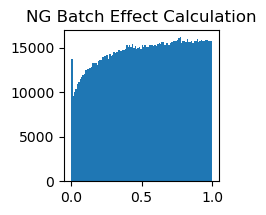

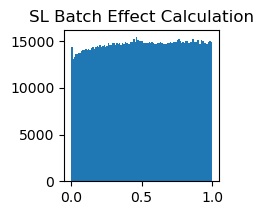

In [61]:
for country in ['NG', 'SL']:
    (fig,ax)=plt.subplots(1,1, figsize=(2,2), dpi=100)
    ax.hist(res_per_country[country]['PVAL'], bins=100)
    ax.set_title('%s Batch Effect Calculation' % country)
    res_per_country[country].index = res_per_country[country]['SNP']
    ind = list(set(res_per_country[country].index).intersection(results.index))
    results.loc[:, 'MLMA_%s_P' % country] = np.nan
    results.loc[ind, 'MLMA_%s_P' % country] = res_per_country[country].loc[ind, 'PVAL']
    display(pd.crosstab(results['MLMA_P']<5e-8, results['MLMA_%s_P' % country]<5e-8))

In [62]:
from statsmodels.stats.multitest import fdrcorrection
for v in ['MLMA_P', 'MLMA_NG_P', 'MLMA_SL_P']:
    ind = ~results[v].isnull()
    p = results.loc[ind, v].values
    (r,q) = fdrcorrection(p)  
    v2 = v.replace('_P', '_Q')
    results.loc[:,v2] = np.nan
    results.loc[ind,v2] = q

In [63]:
tofilter = set()
thresh=.5
for v in ['MLMA_Q', 'MLMA_NG_Q', 'MLMA_SL_Q']:
    tofilter = tofilter.union(results.index[results[v]<thresh])
len(tofilter)

13454

In [64]:
a

'../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

## Do differential missingness test

In [20]:
phenofn = 'gs://popgen-gwas/data/metadata/Annotated_GenotypedData/preANDpost2016_Merged_Complete_Metadata_WithAge_20210818.tsv'
metadata = pd.read_csv(phenofn, sep='\t')
metadata.index = metadata['Full_IID']

group_fn = 'gs://popgen-gwas/data/metadata/Annotated_GenotypedData/OmniH3Merged_PrePost2016_AggregatedLASVPhenotypes_20210829.tsv'

groups = pd.read_csv(group_fn, sep='\t')
groups.index = groups['#IID']
ind = groups.index[groups['Post2016_NG_LASV_qPCR2xPosOrSeqPos'] | groups['Post2016_NG_LASV_SeqPos'] | groups['Pre2016_NG_LASV_SeqPos'] | groups['Pre2016_SL_LASV_AgORSeqPos'] | groups['Post2016_SL_LASV_AgPos']]
metadata['LASV_Case'] = 0
metadata.loc[ind, 'LASV_Case'] = 1

metadata.head()

,Full_IID,Genotype_Sex,ID_Reformat,SampleType,sex,Disease,ISTH_SandR_Key,KGH_Survivor_Key,KGH_AcuteLassa_Key,KGH_AcuteEbola_Key,...,Country,Sex_Discrepant,Sex_Discrepant_Notes,Status,Clean_HLA_ID,Epoch,Array,CollectionEpoch,Age,LASV_Case
Full_IID,,,,,,,,,,,,,,,,,,,,,
July2014NG_SM-6C4M9,July2014NG_SM-6C4M9,1,SM-6C4M9,SuspectedLassaNG,1,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,30.0,0
July2014NG_SM-4XBS9,July2014NG_SM-4XBS9,2,SM-4XBS9,Pre2016ControlNG,2,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,26.0,0
July2014NG_SM-6C4MA,July2014NG_SM-6C4MA,1,SM-6C4MA,SuspectedLassaNG,1,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,32.0,0
July2014NG_SM-6C4MB,July2014NG_SM-6C4MB,2,SM-6C4MB,SuspectedLassaNG,2,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,65.0,0
July2014NG_SM-4XBSM,July2014NG_SM-4XBSM,2,SM-4XBSM,Pre2016ControlNG,2,Lassa,NaN,NaN,NaN,NaN,...,NG,False,NaN,Passes QC,NaN,Pre2016,Omni_25M_B,Pre2016,47.0,0


In [124]:
a = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'
diffmissing = {}
for country in ['NG', 'SL']:
    plink_base = '{a}.{c}.deduped'.format(a=a, c=country)
    fam = pd.read_csv(plink_base+'.fam', sep=' ', header=None)
    fam.index = fam[1]
    display(pd.crosstab(metadata.loc[fam[1], 'Array'], fam[5]))
    cmd = 'plink --bfile {b} --test-missing --out {b} --keep-allele-order'.format(b=plink_base)
    print(cmd)
    !{cmd}
    
    cmd = 'plink --bfile {b} --filter-cases --missing --out {b}.cases --keep-allele-order'.format(b=plink_base)
    print(cmd)
    !{cmd}
    
    cmd = 'plink --bfile {b} --filter-controls --missing --out {b}.controls --keep-allele-order'.format(b=plink_base)
    print(cmd)
    !{cmd}
    
    missing_stat = pd.read_csv(plink_base+'.missing', sep='\s+')
    mcase = pd.read_csv(plink_base+'.cases.lmiss', sep='\s+')
    mcont = pd.read_csv(plink_base+'.controls.lmiss', sep='\s+')
    
    missing_stat.index = missing_stat['SNP']
    mcase.index = mcase['SNP']
    mcont.index = mcase['SNP']
    missing_stat['N_CASE'] = mcase['N_GENO']
    missing_stat['N_CASE_MISS'] = mcase['N_MISS']
    missing_stat['N_CONTROL'] = mcont['N_GENO']
    missing_stat['N_CONTROL_MISS'] = mcont['N_MISS']
    diffmissing[country] = missing_stat

5,1,2
Array,,
H3,0,983
Omni_25M_A,871,0
Omni_25M_B,116,0
Omni_5M,390,0


plink --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped --test-missing --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped --keep-allele-order
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped
  --keep-allele-order
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.NG.deduped
  --test-missing

64422 MB RAM detected; reserving 32211 MB for main workspace.
1470760 variants loaded from .bim file.
2360 people (1146 males, 1214 females) loaded from .fam.
2360 phenotype values loaded f

5,1,2
Array,,
H3,0,1439
Omni_25M_A,715,0
Omni_25M_B,400,0


plink --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped --test-missing --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped --keep-allele-order
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped
  --keep-allele-order
  --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.SL.deduped
  --test-missing

64422 MB RAM detected; reserving 32211 MB for main workspace.
1470760 variants loaded from .bim file.
2554 people (1154 males, 1400 females) loaded from .fam.
2554 phenotype values loaded f

In [125]:
miss_thresh = 3.24e-8
for country in ['NG', 'SL']:
    missing_stat = diffmissing[country]
    (r,q) = fdrcorrection(missing_stat['P'])
    missing_stat['MISSING_Q'] = q
    
    oa = missing_stat['F_MISS_A'] / (1-missing_stat['F_MISS_A'])
    ou = missing_stat['F_MISS_U'] / (1-missing_stat['F_MISS_U'])    
    missing_stat['MISSING_OR'] = oa / ou

    print((missing_stat['P']<miss_thresh).sum())

43506
56760


In [126]:
miss_thresh = 1e-8
or_thresh = 2
for country in ['NG', 'SL']:
    missing_stat = diffmissing[country]
    (r,q) = fdrcorrection(missing_stat['P'])
    missing_stat['MISSING_Q'] = q
    print(((missing_stat['P']<miss_thresh) & ((missing_stat['MISSING_OR']>or_thresh) | (missing_stat['MISSING_OR']<(1/or_thresh)))).sum())

39841
51136


In [127]:
diffmissing['NG'].loc['19:2389044:A:G', :]

CHR                           19
SNP               19:2389044:A:G
F_MISS_A                  0.1017
F_MISS_U               0.0007262
P                      2.602e-38
N_CASE                       983
N_CASE_MISS                  100
N_CONTROL                   1377
N_CONTROL_MISS                 1
MISSING_Q            4.51988e-35
MISSING_OR               155.786
Name: 19:2389044:A:G, dtype: object

In [128]:
x = set(diffmissing['NG'].index[diffmissing['NG']['P']<miss_thresh])
y = set(diffmissing['SL'].index[diffmissing['SL']['P']<miss_thresh])
len(x.union(y))

62391

In [129]:
results['MISS_P_NG'] = diffmissing['NG'].loc[results.index, 'P']
results['MISS_P_SL'] = diffmissing['SL'].loc[results.index, 'P']
results['MISS_OR_NG'] = diffmissing['NG'].loc[results.index, 'MISSING_OR']
results['MISS_OR_SL'] = diffmissing['SL'].loc[results.index, 'MISSING_OR']

In [130]:
results.head()

,B1_AllRep_Concordance,B1_Dedup_Concordance,B1_AllRep_Total,B1_Dedup_Total,B2_AllRep_Concordance,B2_Dedup_Concordance,B2_AllRep_Total,B2_Dedup_Total,Between_AllRep_Concordance,Between_Dedup_Concordance,...,MLMA_logP,MLMA_logQ,MLMA_NG_P,MLMA_SL_P,MLMA_NG_Q,MLMA_SL_Q,MISS_P_NG,MISS_P_SL,MISS_OR_NG,MISS_OR_SL
1:723918:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,...,0.972842,0.000006,0.198732,0.145095,0.999982,0.99998,0.053620,5.776000e-01,0.231942,0.662818
1:752721:A:G,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,...,0.129503,0.000006,0.463662,0.780291,0.999982,0.99998,0.012820,2.458000e-04,0.000000,0.000000
1:767677:G:A,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,...,0.294042,0.000006,0.476544,0.584307,0.999982,0.99998,0.408900,3.669000e-01,0.349424,2.071733
1:771967:G:A,0.0,0.0,62.0,58,0.0,0.0,377.0,234,0.0,0.0,...,0.391976,0.000006,0.894481,0.581096,0.999982,0.99998,0.000075,4.700000e-09,0.195989,0.052123
1:774047:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,...,0.538179,0.000006,0.568441,0.200649,0.999982,0.99998,0.513700,1.905000e-01,0.000000,0.000000


In [131]:
local = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.DuplicateDiscrepancyCounts.WithMLMA.WithPerCountry.Minfilt.20220107.tsv'
results.to_csv(local, sep='\t')

In [132]:
local = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.DuplicateDiscrepancyCounts.WithMLMA.WithPerCountry.Minfilt.20220107.tsv'
results = pd.read_csv(local, sep='\t', index_col=0)
results.head()

,B1_AllRep_Concordance,B1_Dedup_Concordance,B1_AllRep_Total,B1_Dedup_Total,B2_AllRep_Concordance,B2_Dedup_Concordance,B2_AllRep_Total,B2_Dedup_Total,Between_AllRep_Concordance,Between_Dedup_Concordance,...,MLMA_logP,MLMA_logQ,MLMA_NG_P,MLMA_SL_P,MLMA_NG_Q,MLMA_SL_Q,MISS_P_NG,MISS_P_SL,MISS_OR_NG,MISS_OR_SL
1:723918:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,...,0.972842,0.000006,0.198732,0.145095,0.999982,0.99998,0.053620,5.776000e-01,0.231942,0.662818
1:752721:A:G,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,...,0.129503,0.000006,0.463662,0.780291,0.999982,0.99998,0.012820,2.458000e-04,0.000000,0.000000
1:767677:G:A,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,...,0.294042,0.000006,0.476544,0.584307,0.999982,0.99998,0.408900,3.669000e-01,0.349424,2.071733
1:771967:G:A,0.0,0.0,62.0,58,0.0,0.0,377.0,234,0.0,0.0,...,0.391976,0.000006,0.894481,0.581096,0.999982,0.99998,0.000075,4.700000e-09,0.195989,0.052123
1:774047:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,...,0.538179,0.000006,0.568441,0.200649,0.999982,0.99998,0.513700,1.905000e-01,0.000000,0.000000


Text(0.5, 0, 'q-value threshold')

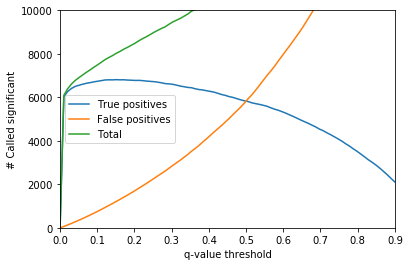

In [133]:
resx = []
for t in np.linspace(0, 1, 100):
    n = (results['MLMA_Q']<t).sum()
    fp = n*t
    tp = n - fp
    resx.append([t, n,fp, tp])
    
resx = pd.DataFrame(resx)

plt.plot(resx[0], resx[3], label='True positives')
plt.plot(resx[0], resx[2], label='False positives')
plt.plot(resx[0], resx[1], label='Total')

plt.xlim([0,.9])
plt.ylim([0,10000])
plt.legend()
plt.ylabel('# Called significant')
plt.xlabel('q-value threshold')

Text(0.5, 0, 'q-value threshold')

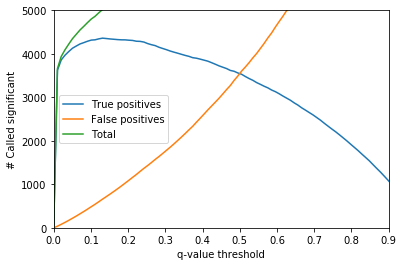

In [134]:
resx = []
for t in np.linspace(0, 1, 100):
    n = (results['MLMA_NG_Q']<t).sum()
    fp = n*t
    tp = n - fp
    resx.append([t, n,fp, tp])
    
resx = pd.DataFrame(resx)

plt.plot(resx[0], resx[3], label='True positives')
plt.plot(resx[0], resx[2], label='False positives')
plt.plot(resx[0], resx[1], label='Total')

plt.xlim([0,.9])
plt.ylim([0,5000])
plt.legend()
plt.ylabel('# Called significant')
plt.xlabel('q-value threshold')

## Output batch-effected variants to filter and filter

In [135]:
q_thresh = .1
q_thresh_post = .3
discthresh = .1
diff_miss_thresh = 3.24e-8

In [136]:
tofilterlist_combined = set()

local_combined = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.DuplicateDiscrepancyCounts.WithMLMA.WithPerCountry.Minfilt.20220107.tsv'
res = pd.read_csv(local_combined, sep='\t', index_col=0)
display(res.head())
for v in ['MLMA_Q', 'MLMA_NG_Q', 'MLMA_SL_Q']:
    tofilterlist_combined = tofilterlist_combined.union(set(res.index[res[v]<q_thresh]))
    
tofilterlist_combined = tofilterlist_combined.union(set(res.index[res['Between_AllRep_FracConcordant']>discthresh]))
tofilterlist_combined = tofilterlist_combined.union(set(res.index[res['Within_AllRep_FracConcordant']>discthresh]))
print(len(tofilterlist_combined))

tofilterlist_combined = tofilterlist_combined.union(set(res.index[res['MISS_P_NG']<diff_miss_thresh]))
tofilterlist_combined = tofilterlist_combined.union(set(res.index[res['MISS_P_SL']<diff_miss_thresh]))
print(len(tofilterlist_combined))


,B1_AllRep_Concordance,B1_Dedup_Concordance,B1_AllRep_Total,B1_Dedup_Total,B2_AllRep_Concordance,B2_Dedup_Concordance,B2_AllRep_Total,B2_Dedup_Total,Between_AllRep_Concordance,Between_Dedup_Concordance,...,MLMA_logP,MLMA_logQ,MLMA_NG_P,MLMA_SL_P,MLMA_NG_Q,MLMA_SL_Q,MISS_P_NG,MISS_P_SL,MISS_OR_NG,MISS_OR_SL
1:723918:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,...,0.972842,0.000006,0.198732,0.145095,0.999982,0.99998,0.053620,5.776000e-01,0.231942,0.662818
1:752721:A:G,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,...,0.129503,0.000006,0.463662,0.780291,0.999982,0.99998,0.012820,2.458000e-04,0.000000,0.000000
1:767677:G:A,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,...,0.294042,0.000006,0.476544,0.584307,0.999982,0.99998,0.408900,3.669000e-01,0.349424,2.071733
1:771967:G:A,0.0,0.0,62.0,58,0.0,0.0,377.0,234,0.0,0.0,...,0.391976,0.000006,0.894481,0.581096,0.999982,0.99998,0.000075,4.700000e-09,0.195989,0.052123
1:774047:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,...,0.538179,0.000006,0.568441,0.200649,0.999982,0.99998,0.513700,1.905000e-01,0.000000,0.000000


7782
74206


In [137]:
tofilterlist_post = set()
local_post = '../../data/tmp/plink/H3/BroadPost2016_H3_B1and2_UpdateSexandID.Coord.RefAllele.NoMulti.NoSexDisc.mDupVars.DuplicateDiscrepancyCounts.WithMLMA.WithPerCountry.20210804.CovCC.minfilt.tsv'
res = pd.read_csv(local_post, sep='\t', index_col=0)
display(res.head())
for v in ['MLMA_Q', 'NG_MLMA_Q', 'SL_MLMA_Q']:
    tofilterlist_post = tofilterlist_post.union(set(res.index[res[v]<q_thresh_post]))
    
tofilterlist_post = tofilterlist_post.union(set(res.index[res['Between_AllRep_FracConcordant']>discthresh]))
tofilterlist_post = tofilterlist_post.union(set(res.index[res['Within_AllRep_FracConcordant']>discthresh]))

len(tofilterlist_post)

,B1_AllRep_Concordance,B1_Dedup_Concordance,B1_AllRep_Total,B1_Dedup_Total,B2_AllRep_Concordance,B2_Dedup_Concordance,B2_AllRep_Total,B2_Dedup_Total,Between_AllRep_Concordance,Between_Dedup_Concordance,...,MLMA_Q,MLMA_logP,MLMA_logQ,Between_AllRep_FracConcordant,Within_AllRep_FracConcordant,NG_MLMA_P,SL_MLMA_P,NG_MLMA_Q,SL_MLMA_Q,Filtered
1:54676:A:G,0.0,0.0,100.0,71,0.0,0.0,205.0,124,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,False
1:108310:A:G,0.0,0.0,95.0,68,0.0,0.0,212.0,124,0.0,0.0,...,0.999660,0.166646,0.000148,0.0,0.0,NaN,0.687995,NaN,0.998716,False
1:256586:A:C,0.0,0.0,100.0,71,0.0,0.0,207.0,124,0.0,0.0,...,0.999660,0.161647,0.000148,0.0,0.0,0.405739,0.960823,0.996992,0.999996,False
1:534247:A:G,0.0,0.0,99.0,70,0.0,0.0,213.0,125,0.0,0.0,...,0.999501,1.074475,0.000217,0.0,0.0,0.099889,0.187960,0.996992,0.998716,False
1:723918:A:G,0.0,0.0,100.0,71,0.0,0.0,214.0,126,0.0,0.0,...,0.999660,0.130460,0.000148,0.0,0.0,0.517731,0.970380,0.996992,0.999996,False


2958

In [138]:
comparison_strs = ['25a_vs_25b', '25a_vs_5', '25b_vs_5', '25_vs_5']
tofilterlist_pre = set()
for c in comparison_strs:
    local = '../../data/tmp/plink/merged_pre2016/BroadPre2016.%s.DuplicateDiscrepancyCounts.WithMLMA.WithPerCountry.20210805.CovCC.minfilt.tsv' % c
    res = pd.read_csv(local, sep='\t', index_col=0)        
    for v in ['MLMA_Q', 'MLMA_NG_Q', 'MLMA_SL_Q']:
        if (v == 'MLMA_SL_Q') & (c != '25a_vs_25b'):
            continue
        tofilterlist_pre = tofilterlist_pre.union(set(res.index[res[v]<q_thresh]))
        

    tofilterlist_pre = tofilterlist_pre.union(set(res.index[res['Between_AllRep_FracConcordant']>discthresh]))
    tofilterlist_pre = tofilterlist_pre.union(set(res.index[res['Within_AllRep_FracConcordant']>discthresh]))
    
len(tofilterlist_pre)

20514

In [139]:
tofilterlist = list(tofilterlist_pre.union(tofilterlist_post).union(tofilterlist_combined))
len(tofilterlist)

90667

In [140]:
tofilter = results.index.isin(tofilterlist)
results['Filtered'] = tofilter

In [141]:
results['Filtered'].value_counts()

False    1392233
True       78527
Name: Filtered, dtype: int64

In [142]:
results.head()

,B1_AllRep_Concordance,B1_Dedup_Concordance,B1_AllRep_Total,B1_Dedup_Total,B2_AllRep_Concordance,B2_Dedup_Concordance,B2_AllRep_Total,B2_Dedup_Total,Between_AllRep_Concordance,Between_Dedup_Concordance,...,MLMA_logQ,MLMA_NG_P,MLMA_SL_P,MLMA_NG_Q,MLMA_SL_Q,MISS_P_NG,MISS_P_SL,MISS_OR_NG,MISS_OR_SL,Filtered
1:723918:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,...,0.000006,0.198732,0.145095,0.999982,0.99998,0.053620,5.776000e-01,0.231942,0.662818,False
1:752721:A:G,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,...,0.000006,0.463662,0.780291,0.999982,0.99998,0.012820,2.458000e-04,0.000000,0.000000,False
1:767677:G:A,0.0,0.0,67.0,61,0.0,0.0,379.0,233,0.0,0.0,...,0.000006,0.476544,0.584307,0.999982,0.99998,0.408900,3.669000e-01,0.349424,2.071733,False
1:771967:G:A,0.0,0.0,62.0,58,0.0,0.0,377.0,234,0.0,0.0,...,0.000006,0.894481,0.581096,0.999982,0.99998,0.000075,4.700000e-09,0.195989,0.052123,True
1:774047:G:A,0.0,0.0,67.0,61,0.0,0.0,380.0,234,0.0,0.0,...,0.000006,0.568441,0.200649,0.999982,0.99998,0.513700,1.905000e-01,0.000000,0.000000,False


In [143]:
pd.Series([x.split(':')[0] for x in results.index[results['Filtered']]]).astype(int).value_counts().sort_index()

1     5637
2     5848
3     4889
4     4599
5     4408
6     4819
7     4083
8     3800
9     3432
10    3718
11    3488
12    3497
13    2575
14    2481
15    2346
16    2849
17    2547
18    2254
19    2248
20    1895
21    1150
22    1357
23    4356
24     251
dtype: int64

In [144]:
local_combined

'../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.DuplicateDiscrepancyCounts.WithMLMA.WithPerCountry.Minfilt.20220107.tsv'

In [145]:
remote = 'gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/'
cmd = 'gsutil -m cp {local} {remote}'.format(local=local_combined, remote=remote)
print(cmd)
!{cmd}

gsutil -m cp ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.DuplicateDiscrepancyCounts.WithMLMA.WithPerCountry.Minfilt.20220107.tsv gs://popgen-gwas/data/analysis/Imputation_BatchCorrection/
Copying file://../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.DuplicateDiscrepancyCounts.WithMLMA.WithPerCountry.Minfilt.20220107.tsv [Content-Type=text/tab-separated-values]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
wi

In [146]:
a

'../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

In [147]:
a = '../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1'

In [148]:
batchfn = a + '.PreVsPostbatchFilterList.txt'
open(batchfn, 'w').write('\n'.join(tofilterlist))

1419678

In [149]:
len(tofilterlist)

90667

In [150]:
bim = pd.read_csv(a+'.bim', sep='\t', header=None)

In [151]:
bim.shape

(1470760, 6)

In [152]:
results.shape

(1470760, 29)

In [153]:
len(set(results.index)), len(set(results.index).intersection(bim[1]))

(1470760, 1470760)

In [154]:
bim[0].value_counts()

2     121564
1     112438
3     100553
6      96351
4      95272
5      91452
7      80473
8      79165
10     75652
11     71211
12     70437
9      66010
13     51462
16     48261
14     47530
15     45921
18     43497
17     39916
20     34556
23     30672
19     28367
22     20211
21     19480
24       309
Name: 0, dtype: int64

In [155]:
cmd = 'plink --make-bed --bfile {a} --out {a}.filtBatchvars20220223 --exclude {batchfn} --keep-allele-order'.format(a=a, batchfn=batchfn)
print(cmd)
!{cmd}

plink --make-bed --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1 --out ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.filtBatchvars20220223 --exclude ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.PreVsPostbatchFilterList.txt --keep-allele-order
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.filtBatchvars20220223.log.
Options in effect:
  --bfile ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1
  --exclude ../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.PreVsPostbatchFilterList.txt
  --keep-allele-order
  --make-bed
  --out ../../data/tmp/plink/MergePrePost/OmniH

In [156]:
a = '{a}.filtBatchvars20220223'.format(a=a)
print(a)

../../data/tmp/plink/MergePrePost/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.filtBatchvars20220223
